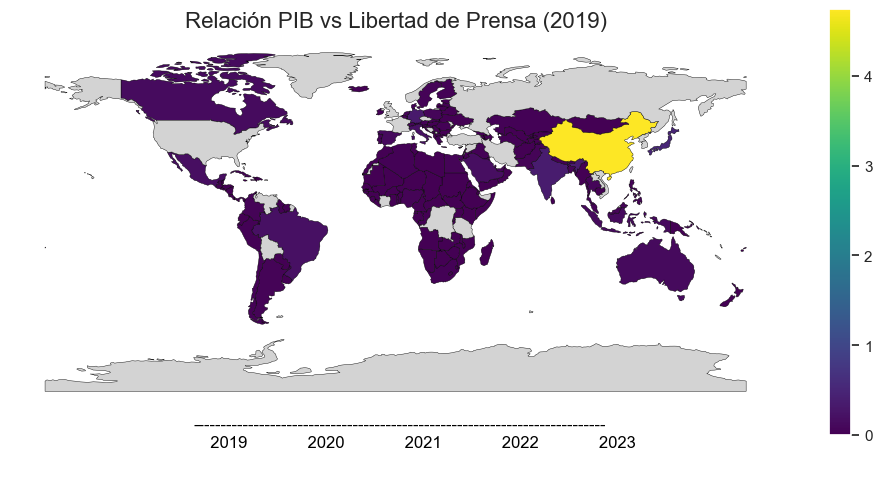

In [233]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pycountry

# Cargar tus datos
df = pd.read_csv("Prensa_Ingreso.csv")

# 1. Convertir nombres de países a códigos ISO Alpha-3
def get_iso_code(country_name):
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except:
        return None

df["ISO"] = df["Country"].apply(get_iso_code)

# 2. Cargar shapefile desde tu computadora
world = gpd.read_file("ne_data/ne_110m_admin_0_countries.shp")  # Ruta al archivo descargado

# 3. Fusionar datos con el mapa
merged_data = world.merge(df, how="left", left_on="ISO_A3", right_on="ISO")

# 4. Crear métrica combinada (ejemplo)
merged_data["Metrica"] = (merged_data["2019_total_gdp"] / merged_data["2019_total_gdp"].max()) * (100 / merged_data["2019_Score"])

# 5. Configurar el mapa
fig, ax = plt.subplots(figsize=(10, 5))
merged_data.plot(
    column="Metrica",
    cmap="viridis",
    edgecolor="black",
    linewidth=0.3,
    legend=True,
    ax=ax,
    missing_kwds={"color": "lightgrey"}
)

#Añadir barra de tiempo simulada
plt.annotate(
    """---------------------------------------------------------------------------
          2019             2020             2021             2022             2023
    """,
    xy=(0.4, 0.04),
    xycoords="figure fraction",
    ha="center",
    color="black",
    fontsize=12,
    weight="normal"
)

#Ajustes finales
plt.title("Relación PIB vs Libertad de Prensa (2019)", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()

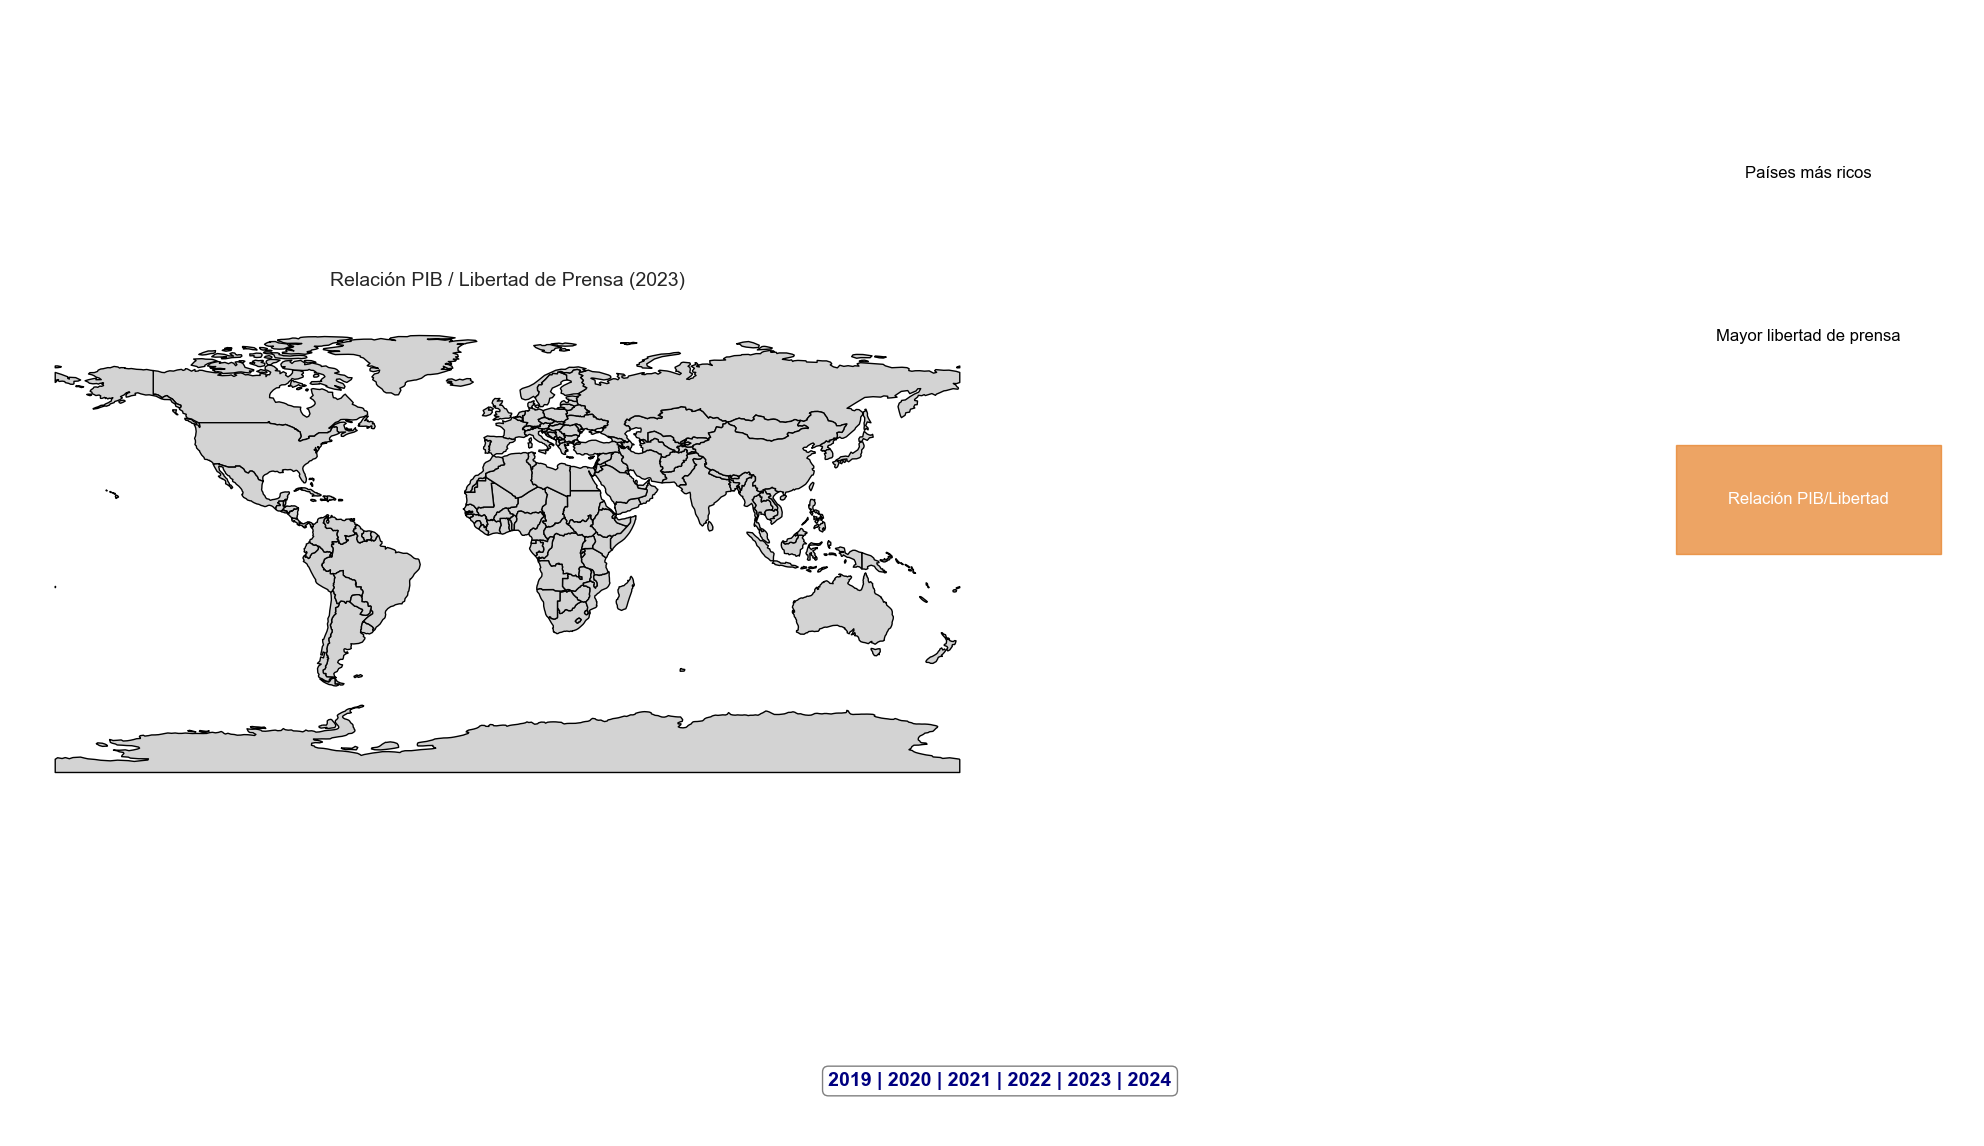

In [234]:
import matplotlib.pyplot as plt
import geopandas as gpd

# ------------------------------------------------------
# 1. Configurar el layout del gráfico
# ------------------------------------------------------
fig = plt.figure(figsize=(20, 12))
grid = plt.GridSpec(1, 2, width_ratios=[3, 1])  # 3:1 para mapa vs panel

# ------------------------------------------------------
# 2. Mapa de la relación (izquierda)
# ------------------------------------------------------
ax_map = plt.subplot(grid[0])

# (Aquí iría tu código para generar el mapa de la relación PIB/Libertad)
# Ejemplo simplificado:
world = gpd.read_file("ne_data/ne_110m_admin_0_countries.shp")
world.plot(ax=ax_map, color="lightgrey", edgecolor="black")
ax_map.set_title("Relación PIB / Libertad de Prensa (2023)", fontsize=14, pad=20)
ax_map.axis("off")

# ------------------------------------------------------
# 3. Panel de opciones simuladas (derecha)
# ------------------------------------------------------
ax_panel = plt.subplot(grid[1])
ax_panel.axis("off")  # Ocultar ejes

# Simular botones de selección
options = {
    "Países más ricos": {"color": "#3498db", "selected": False},
    "Mayor libertad de prensa": {"color": "#2ecc71", "selected": False},
    "Relación PIB/Libertad": {"color": "#e67e22", "selected": True}  # Seleccionado
}

y_position = 0.8  # Posición inicial vertical
for option, config in options.items():
    bg_color = config["color"] if config["selected"] else "white"
    text_color = "white" if config["selected"] else "black"
    
    # Dibujar "botón"
    ax_panel.add_patch(plt.Rectangle((0.1, y_position), 0.8, 0.1, 
                      color=bg_color, transform=ax_panel.transAxes, alpha=0.7))
    # Texto del botón
    ax_panel.text(0.5, y_position + 0.05, option, 
                ha="center", va="center", color=text_color,
                fontsize=12, transform=ax_panel.transAxes)
    
    y_position -= 0.15  # Espacio entre botones

# ------------------------------------------------------
# 4. Barra de tiempo simulada (inferior)
# ------------------------------------------------------
plt.annotate("2019 | 2020 | 2021 | 2022 | 2023 | 2024", 
             xy=(0.5, 0.05), 
             xycoords="figure fraction",
             ha="center", 
             color="navy", 
             fontsize=14,
             weight="bold",
             bbox=dict(facecolor="white", edgecolor="gray", boxstyle="round"))

plt.tight_layout()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\F'
<>:10: SyntaxWarning: invalid escape sequence '\C'
<>:9: SyntaxWarning: invalid escape sequence '\F'
<>:10: SyntaxWarning: invalid escape sequence '\C'
C:\Users\vbele\AppData\Local\Temp\ipykernel_18804\3464656645.py:9: SyntaxWarning: invalid escape sequence '\F'
  df_press = pd.read_csv("data limpia\Free_Press_CLEEN.csv")
C:\Users\vbele\AppData\Local\Temp\ipykernel_18804\3464656645.py:10: SyntaxWarning: invalid escape sequence '\C'
  df_income = pd.read_csv("data limpia\Countries_GDP_CLEEN.csv")


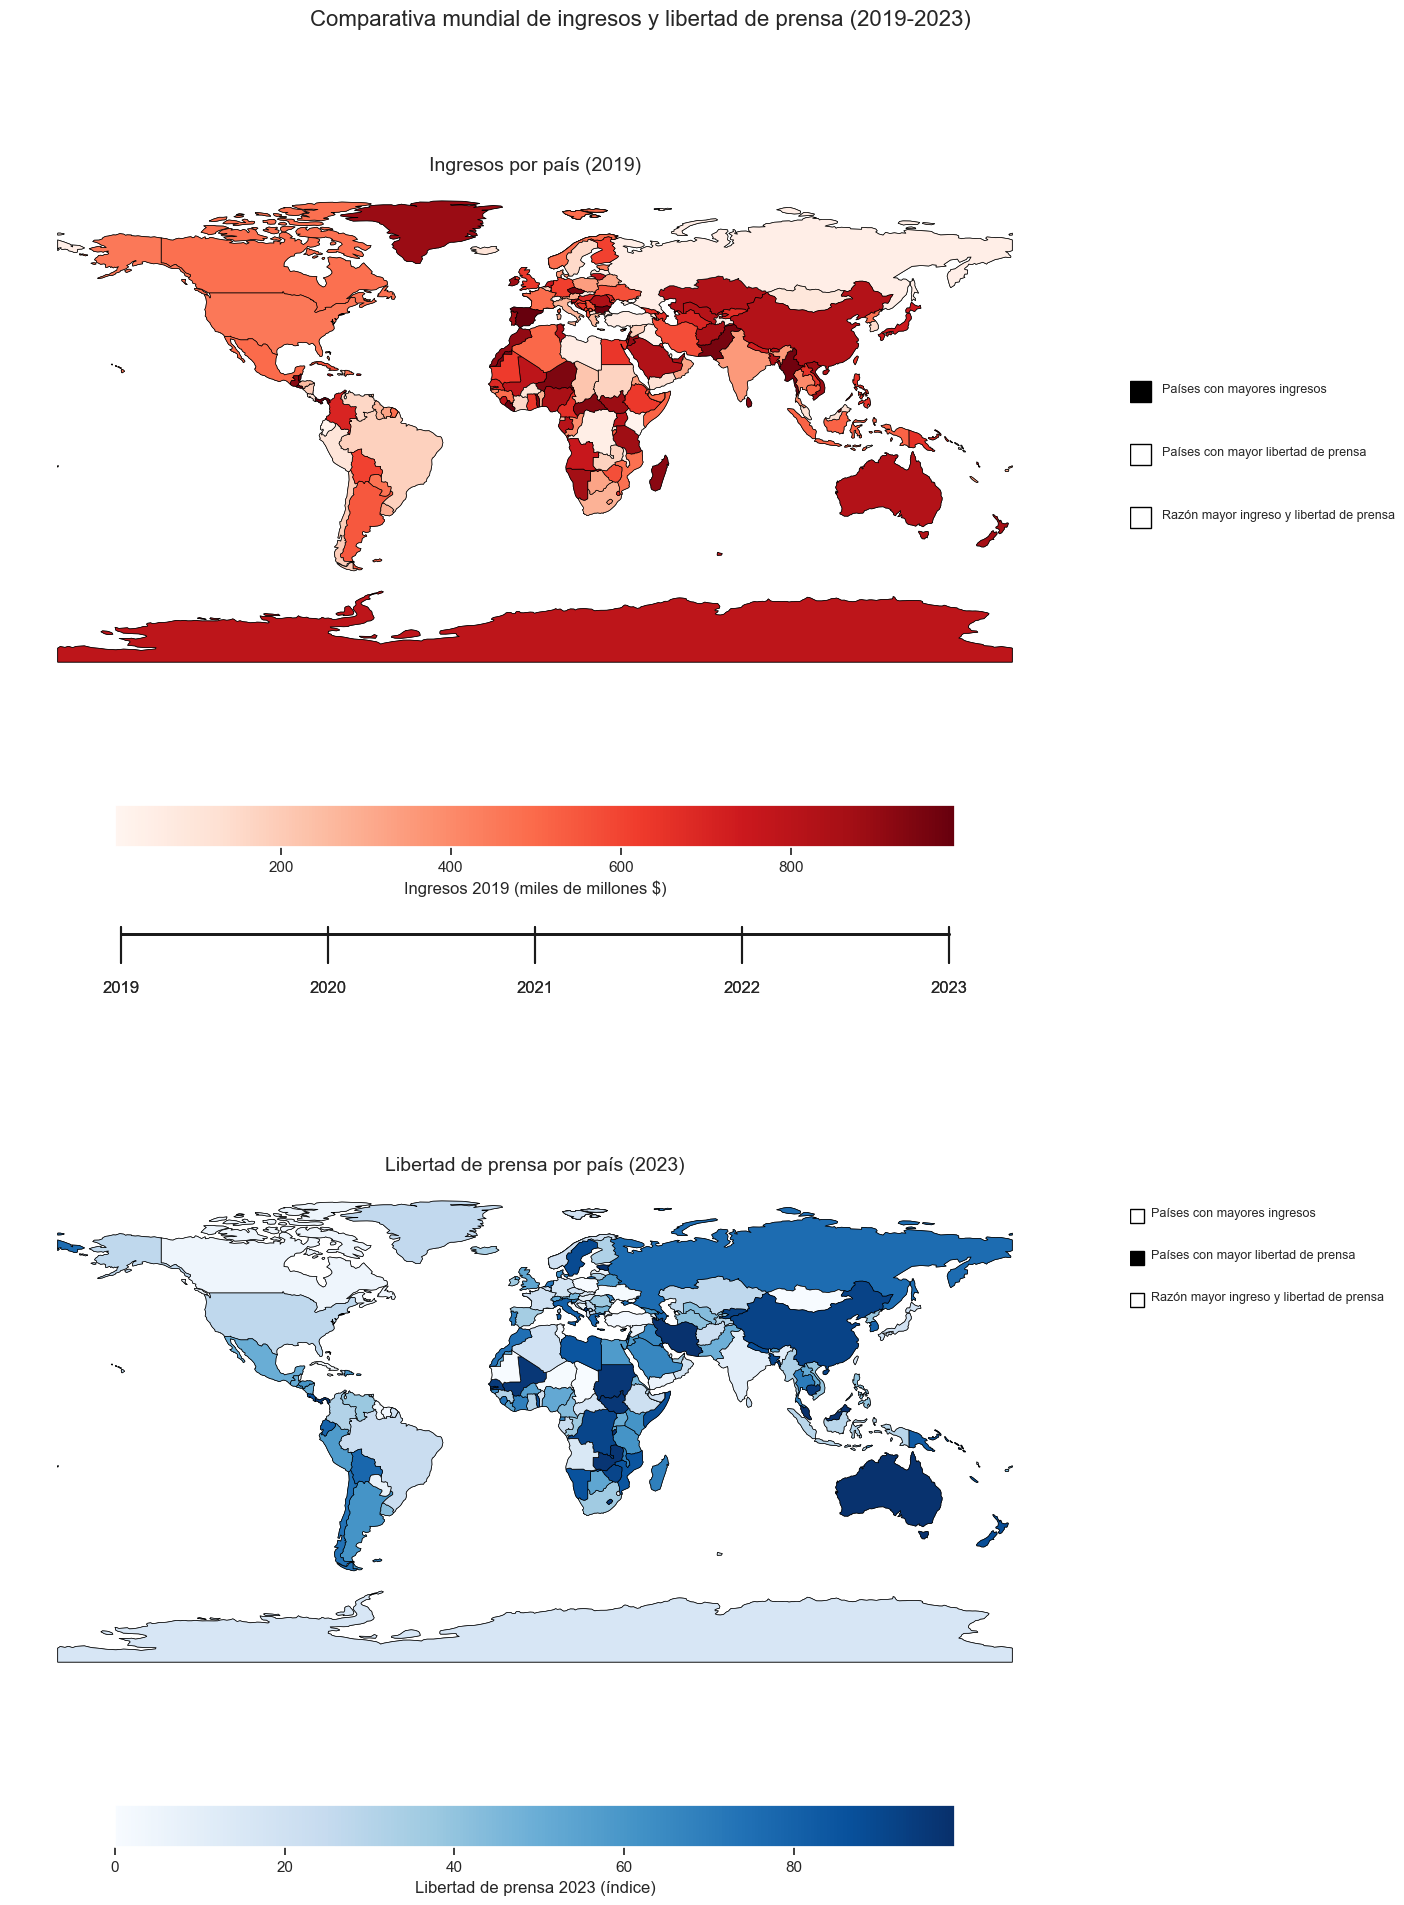

In [235]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import numpy as np

# Cargar shapefile desde tu ruta específica
world = gpd.read_file("ne_data/ne_110m_admin_0_countries.shp")

df_press = pd.read_csv("data limpia\Free_Press_CLEEN.csv")
df_income = pd.read_csv("data limpia\Countries_GDP_CLEEN.csv")

# Para este ejemplo, crearemos datos ficticios
countries = world['ISO_A3'].tolist()
np.random.seed(42)

# Datos ficticios de libertad de prensa (0-100, donde 100 es más libertad)
press_freedom = pd.DataFrame({
    'ISO_A3': countries,
    'press_2019': np.random.randint(0, 100, size=len(countries)),
    'press_2023': np.random.randint(0, 100, size=len(countries))
})

# Datos ficticios de ingresos (en miles de millones de dólares)
income = pd.DataFrame({
    'ISO_A3': countries,
    'income_2019': np.random.randint(1, 1000, size=len(countries)),
    'income_2023': np.random.randint(1, 1000, size=len(countries))
})

# Fusionar datos con el shapefile mundial
world_press = world.merge(press_freedom, on='ISO_A3', how='left')
world_income = world.merge(income, on='ISO_A3', how='left')


world['ratio_2019'] = world_income['income_2019'] / (world_press['press_2019'] + 1)  # +1 para evitar divisiones por cero
world['ratio_2023'] = world_income['income_2023'] / (world_press['press_2023'] + 1)

# Fusionar datos con el shapefile mundial
world_press = world.merge(press_freedom, on='ISO_A3', how='left')
world_income = world.merge(income, on='ISO_A3', how='left')

# Configurar la figura con dos mapas y espacio para la leyenda
fig = plt.figure(figsize=(14, 20))

# Definir posición para el primer mapa
ax1 = fig.add_axes([0.05, 0.52, 0.75, 0.4])

world.plot(ax=ax1, color='white', edgecolor='black', linewidth=0.5)
ax1.axis('off')

world_income.plot(column='income_2019', ax=ax1, cmap='Reds', edgecolor='black', linewidth=0.5, legend=True, 
                 legend_kwds={'label': "Ingresos 2019 (miles de millones $)", 'orientation': "horizontal", 'shrink': 0.8})
ax1.set_title('Ingresos por país (2019)', fontsize=14)
ax1.axis('off')

# Definir posición para la línea de tiempo
timeline_ax = fig.add_axes([0.1, 0.5, 0.65, 0.02]) 

years = [2019, 2020, 2021, 2022, 2023]
timeline_ax.plot([0, 1], [0, 0], 'k-', linewidth=2)
for i, year in enumerate(years):
    x = i / (len(years) - 1)
    timeline_ax.plot([x, x], [-0.04, 0.01], 'k-')

    timeline_ax.text(x, -0.08, str(year), ha='center')

timeline_ax.axis('off')

# Definir posición para el segundo mapa
ax2 = fig.add_axes([0.05, 0.02, 0.75, 0.4])
world.plot(ax=ax2, color='white', edgecolor='black', linewidth=0.5)
ax2.axis('off')

# Por defecto mostrar mapa de libertad de prensa para 2023
world_press.plot(column='press_2023', ax=ax2, cmap='Blues', edgecolor='black', linewidth=0.5, legend=True,
                legend_kwds={'label': "Libertad de prensa 2023 (índice)", 'orientation': "horizontal", 'shrink': 0.8})
ax2.set_title('Libertad de prensa por país (2023)', fontsize=14)
ax2.axis('off')


# Línea de tiempo para el segundo mapa
timeline_ax2 = fig.add_axes([0.1, 0.5, 0.65, 0.02])

timeline_ax2.plot([0, 1], [0, 0], 'k-', linewidth=2)
for i, year in enumerate(years):
    x = i / (len(years) - 1)
    timeline_ax2.plot([x, x], [-0.04, 0.01], 'k-')

    timeline_ax2.text(x, -0.08, str(year), ha='center')
timeline_ax2.axis('off')

checkbox_ax1 = fig.add_axes([0.85, 0.65, 0.15, 0.2]) 

checkbox_ax1.set_aspect('equal')  # Esto fuerza la relación de aspecto igual
checkbox_ax1.axis('off')

# Dimensiones para checkboxes cuadrados
box_size = 0.1

# Crear checkboxes
checkboxes = [
    plt.Rectangle((0, 0.8), box_size, box_size, fill=True, color='black'),
    plt.Rectangle((0, 0.5), box_size, box_size, fill=False, color='black'),
    plt.Rectangle((0, 0.2), box_size, box_size, fill=False, color='black')
]

# Añadir checkboxes al gráfico
for box in checkboxes:
    checkbox_ax1.add_patch(box)

# Añadir etiquetas
checkbox_ax1.text(0.15, 0.85, 'Países con mayores ingresos', fontsize=9)
checkbox_ax1.text(0.15, 0.55, 'Países con mayor libertad de prensa', fontsize=9)
checkbox_ax1.text(0.15, 0.25, 'Razón mayor ingreso y libertad de prensa', fontsize=9)

# Crear checkboxes y etiquetas para el segundo mapa
checkbox_ax2 = fig.add_axes([0.85, 0.25, 0.1, 0.2]) 
checkbox_ax2.set_aspect('equal')  # Esto fuerza la relación de aspecto igual
checkbox_ax2.axis('off')

# Crear checkboxes
checkboxes2 = [
    plt.Rectangle((0, 0.8), box_size, box_size, fill=False, color='black'),
    plt.Rectangle((0, 0.5), box_size, box_size, fill=True, color='black'),
    plt.Rectangle((0, 0.2), box_size, box_size, fill=False, color='black')
]

# Añadir checkboxes al gráfico
for box in checkboxes2:
    checkbox_ax2.add_patch(box)

# Añadir etiquetas
checkbox_ax2.text(0.15, 0.85, 'Países con mayores ingresos', fontsize=9)
checkbox_ax2.text(0.15, 0.55, 'Países con mayor libertad de prensa', fontsize=9)
checkbox_ax2.text(0.15, 0.25, 'Razón mayor ingreso y libertad de prensa', fontsize=9)

# Añadir título general
plt.figtext(0.5, 0.97, 'Comparativa mundial de ingresos y libertad de prensa (2019-2023)', 
           ha='center', fontsize=16, weight='normal')

plt.show()